Dataset loaded successfully!
First few rows of the dataset:
                                              tweets  target
0  Our Deeds are the Reason of this #earthquake M...       1
1             Forest fire near La Ronge Sask. Canada       1
2  All residents asked to 'shelter in place' are ...       1
3  13,000 people receive #wildfires evacuation or...       1
4  Just got sent this photo from Ruby #Alaska as ...       1

Checking for null values in the dataset:
tweets    0
target    0
dtype: int64

Null values handled. Updated dataset shape:
(7613, 2)

Preprocessing completed. Sample of cleaned tweets:
0          deed reason #earthquake may allah forgive u
1               forest fire near la ronge sask. canada
2    resident asked 'shelter place' notified office...
3    13,000 people receive #wildfires evacuation or...
4    got sent photo ruby #alaska smoke #wildfires p...
Name: cleaned_tweets, dtype: object

Vectorization completed. Shape of TF-IDF matrix:
(7613, 77398)

Data split i

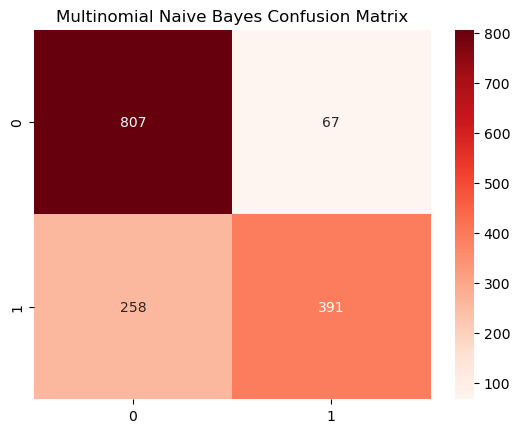


Logistic Regression Accuracy: 0.7905
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       874
           1       0.83      0.64      0.72       649

    accuracy                           0.79      1523
   macro avg       0.80      0.77      0.78      1523
weighted avg       0.80      0.79      0.79      1523

Confusion Matrix for Logistic Regression:


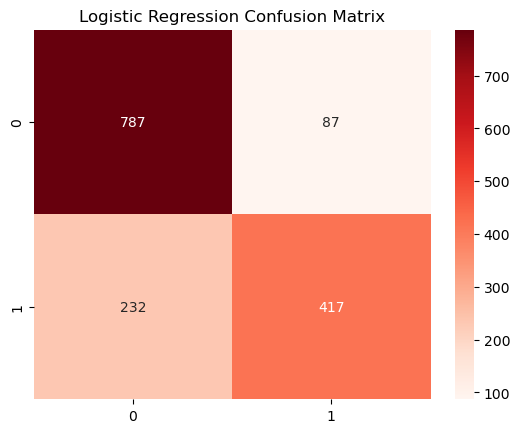


KNN Accuracy: 0.7636
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.76      0.85      0.81       874
           1       0.77      0.64      0.70       649

    accuracy                           0.76      1523
   macro avg       0.76      0.75      0.75      1523
weighted avg       0.76      0.76      0.76      1523

Confusion Matrix for KNN:


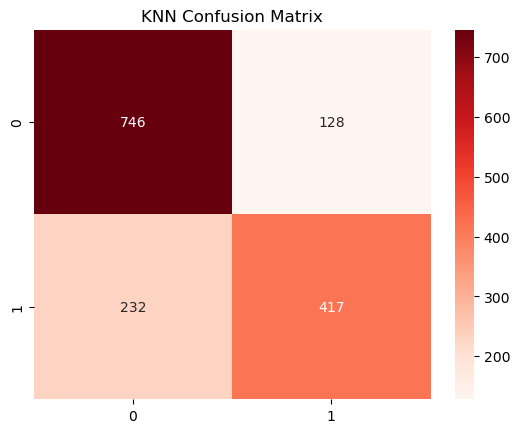


The best model is Logistic Regression with an accuracy of 0.7905


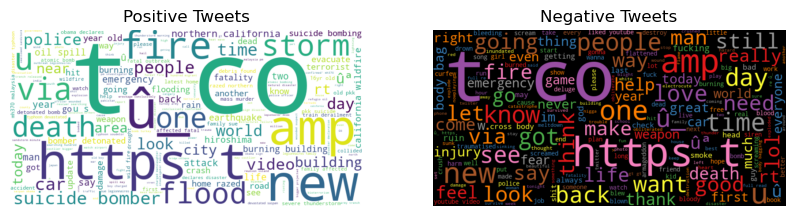

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
import string
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the dataset
url = "https://drive.google.com/uc?id=1eslDKi95Pg7BYZKcrXCXPP3KQj_pdnUd"
df = pd.read_csv(url)
print("Dataset loaded successfully!")
print("First few rows of the dataset:")
print(df.head())  # Display the first few rows
print("\nChecking for null values in the dataset:")
print(df.isnull().sum())  # Check for null values

# Handle null values
df.dropna(inplace=True)
print("\nNull values handled. Updated dataset shape:")
print(df.shape)

# Preprocess the tweets
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_tweet(tweet):
    words = tweet.split()
    cleaned_words = [
        lemmatizer.lemmatize(word.lower()) for word in words
        if word.lower() not in stop_words and word not in string.punctuation
    ]
    return ' '.join(cleaned_words)

df['cleaned_tweets'] = df['tweets'].apply(preprocess_tweet)
print("\nPreprocessing completed. Sample of cleaned tweets:")
print(df['cleaned_tweets'].head())

# Transform the words into vectors using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Using TF-IDF and n-grams
X = vectorizer.fit_transform(df['cleaned_tweets'])
y = df['target'].values
print("\nVectorization completed. Shape of TF-IDF matrix:")
print(X.shape)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData split into training and test sets:")
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Apply classification models with hyperparameter tuning
param_grid_lr = {'C': [0.1, 1, 10]}
param_grid_knn = {'n_neighbors': [3, 5, 7]}

models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5),
    "KNN": GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
}

# Train models and generate predictions
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    # Print classification report and confusion matrix
    print(f"\n{name} Accuracy: {accuracy:.4f}")
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

# Report the model with the best accuracy
best_model = max(results, key=results.get)
print(f"\nThe best model is {best_model} with an accuracy of {results[best_model]:.4f}")

# Visualize the data
# Word Cloud for Positive and Negative Tweets
positive_tweets = ' '.join(df.loc[df.target == 1, 'cleaned_tweets'])
negative_tweets = ' '.join(df.loc[df.target == 0, 'cleaned_tweets'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Set1').generate(negative_tweets)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Tweets')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Tweets')

plt.show()